In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import emoji
import seaborn as sns

In [2]:
df = pd.read_csv("Data/cleaned_by_language.csv")

In [3]:
en_df = df[df['language'] == 'en']
es_df = df[df['language'] == 'es']

## Create Corpus

In [4]:
en_corpus = en_df['text'].tolist()
es_corpus = es_df['text'].tolist()

## Create Emoji Set

In [20]:
emoji_list = df['emoji list'].tolist()

emoji_list = list(itertools.chain.from_iterable(emoji_list))
delete = {"'","\"", " ", "[", "]", ",", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "\\", "a", "e", "f", "U"}
new_emoji_list = []

for ele in emoji_list:
    if ele not in delete:
        new_emoji_list.append(ele)
        
emoji_set = set(new_emoji_list)

## TF-IDF for English Comments: 
### TF(emoji, comment) = (Number of times the emoji appears in the comment) / (Total number of emojis in the comment)

In [21]:
# tf: emoji occurance / word count+emoji count
en_docs = len(en_corpus)         #·Number of comments in the corpus
n_emoji_set = len(emoji_set) #·Number of unique emoji in the comment

en_word = en_df['word count'].tolist()
en_emoji = en_df['emoji count'].tolist()
en_counts = [en_word[i] + en_emoji[i] for i in range(len(en_word))] # Number of word_emoji count in the comment

en_emoji_list = en_df['emoji list'].tolist()
 
en_df_tf = pd.DataFrame(np.zeros((en_docs, n_emoji_set)), columns=emoji_set)
 
# Compute Term Frequency (TF)
for i in range(en_docs):
    for e in en_emoji_list[i]:
        if e not in emoji_set:
            continue
        en_df_tf[e][i] = en_df_tf[e][i] + (1 / (en_emoji[i]))
         
en_df_tf
# en_df_tf['😂'].head(20)

,✍,🏻,😝,🩹,👮,🤭,👋,😁,🏃,🥅,...,👩,👍,🌍,🏆,🥵,🥳,😍,😞,💯,🤍
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.0,0.0
276,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
277,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0


### IDF(emoji, corpus) = log(Total number of comments in the corpus / Number of comments containing the emoji)

In [22]:
#idf
en_idf = {}
 
for w in emoji_set:
    k = 0    # number of documents in the corpus that contain this word
     
    for i in range(en_docs):
        if w in en_emoji_list[i]:
            k += 1
             
    en_idf[w] =  np.log10(en_docs / (k + 1)) # k+1 to avoid division by 0
     
    print(f'{w:>15}: {en_idf[w]:>10}' )

              ✍: 2.4471580313422194
              🏻: 1.4471580313422192
              😝: 1.9700367766225568
              🩹: 2.146128035678238
              👮: 2.146128035678238
              🤭: 2.146128035678238
              👋: 1.9700367766225568
              😁: 2.146128035678238
              🏃: 1.9700367766225568
              🥅: 2.4471580313422194
              👻: 2.4471580313422194
              😄: 1.9700367766225568
              🤔: 1.845098040014257
              🤦: 1.7481880270062005
              🕺: 2.146128035678238
              🙃: 2.146128035678238
              🟡: 2.4471580313422194
              👏:        1.0
              🥶: 2.146128035678238
              🫂: 2.146128035678238
              ✈: 2.4471580313422194
              😫: 2.146128035678238
              💛: 1.845098040014257
              🦅: 2.146128035678238
              😂: 0.5550634286517389
              💕: 2.4471580313422194
              ☕: 1.9700367766225568
              ☺: 2.146128035678238
             

In [23]:
# compute TF-idf
en_df_tf_idf = en_df_tf.copy()
 
for w in emoji_set:
    for i in range(en_docs):
        en_df_tf_idf[w][i] = en_df_tf[w][i] * en_idf[w]
         
en_df_tf_idf

,✍,🏻,😝,🩹,👮,🤭,👋,😁,🏃,🥅,...,👩,👍,🌍,🏆,🥵,🥳,😍,😞,💯,🤍
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.143266,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.146128,0.0,0.0,0.0
276,0.0,0.289432,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
277,0.0,0.723579,0.0,0.0,0.0,0.0,0.985018,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
278,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


## TF-IDF for Spanish Comments: 

In [24]:
# tf: emoji occurance / word count+emoji count
es_docs = len(es_corpus)         #·Number of comments in the corpus
n_emoji_set = len(emoji_set) #·Number of unique emoji in the comment

es_word = es_df['word count'].tolist()
es_emoji = es_df['emoji count'].tolist()
es_counts = [es_word[i] + es_emoji[i] for i in range(len(es_word))] # Number of word_emoji count in the comment

es_emoji_list = es_df['emoji list'].tolist()
 
es_df_tf = pd.DataFrame(np.zeros((es_docs, n_emoji_set)), columns=emoji_set)
 
# Compute Term Frequency (TF)
for i in range(es_docs):
    for e in es_emoji_list[i]:
        if e not in emoji_set:
            continue
        es_df_tf[e][i] = es_df_tf[e][i] + (1 / es_emoji[i])
         
es_df_tf

,✍,🏻,😝,🩹,👮,🤭,👋,😁,🏃,🥅,...,👩,👍,🌍,🏆,🥵,🥳,😍,😞,💯,🤍
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#idf
es_idf = {}
 
for w in emoji_set:
    k = 0    # number of documents in the corpus that contain this word
     
    for i in range(es_docs):
        if w in es_emoji_list[i]:
            k += 1
             
    es_idf[w] =  np.log10(es_docs / (k + 1)) # k+1 to avoid division by 0
     
    print(f'{w:>15}: {es_idf[w]:>10}' )

              ✍: 2.146128035678238
              🏻: 1.405765346183994
              😝: 2.4471580313422194
              🩹: 2.146128035678238
              👮: 2.4471580313422194
              🤭: 2.4471580313422194
              👋: 2.146128035678238
              😁: 2.146128035678238
              🏃: 2.4471580313422194
              🥅: 2.146128035678238
              👻: 2.146128035678238
              😄: 2.4471580313422194
              🤔: 1.845098040014257
              🤦: 1.9700367766225568
              🕺: 2.4471580313422194
              🙃: 2.4471580313422194
              🟡: 2.146128035678238
              👏: 1.0321846833714012
              🥶: 1.9700367766225568
              🫂: 2.4471580313422194
              ✈: 2.146128035678238
              😫: 2.4471580313422194
              💛: 2.146128035678238
              🦅: 2.146128035678238
              😂: 0.6020599913279624
              💕: 2.146128035678238
              ☕: 2.4471580313422194
              ☺: 2.146128035678238
      

In [26]:
# compute TF-idf
es_df_tf_idf = es_df_tf.copy()
 
for w in emoji_set:
    for i in range(es_docs):
        es_df_tf_idf[w][i] = es_df_tf[w][i] * es_idf[w]
         
es_df_tf_idf

,✍,🏻,😝,🩹,👮,🤭,👋,😁,🏃,🥅,...,👩,👍,🌍,🏆,🥵,🥳,😍,😞,💯,🤍
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.124939,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


## Comparison: Summing the TF-IDF scores to understand the overall importance of emojis within a group of comments, rather than at the individual comment level. 

In [27]:
en_sums = en_df_tf_idf.sum()

top_20_en = en_sums.sort_values(ascending=False).head(20)

print("Top 20 TF-IDF in English:")
print(top_20_en)

Top 20 TF-IDF in English:
😂    38.482596
❤    20.133687
🤣    19.370374
🔥    18.726923
👏    18.034199
😍    17.138707
💀    11.128976
🙌     8.824001
😢     7.209270
🐐     6.118658
😉     6.010836
🤔     4.612745
😭     4.612745
🏻     4.510309
🏆     4.459067
😊     4.370470
⚽     4.311601
🤫     4.037482
🤬     3.940074
👎     3.940074
dtype: float64


In [28]:
es_sums = es_df_tf_idf.sum()

top_20_es = es_sums.sort_values(ascending=False).head(20)

print("Top 20 TF-IDF in Spanish:")
print(top_20_es)

Top 20 TF-IDF in Spanish:
😂    38.678846
❤    25.131383
🔥    22.462933
👏    17.596291
😢    17.259105
😍    15.885499
🙌    14.937187
🤣     7.743290
💙     7.286531
🏆     5.745165
🤫     5.244564
🏼     4.914945
🏻     4.849890
⚽     4.786611
👍     4.501026
🤔     4.382108
🙏     4.089067
😭     3.940074
👎     3.940074
🥶     3.940074
dtype: float64


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129657 (\N{ADHESIVE BANDAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128110 (\N{POLICE OFFICER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129325 (\N{SMILING FACE WITH SMILING EYES AND HAND COVERING MOUTH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128075 (\N{WAVING HAND SIGN}) missing from current font.
  fig.canvas.print_fig

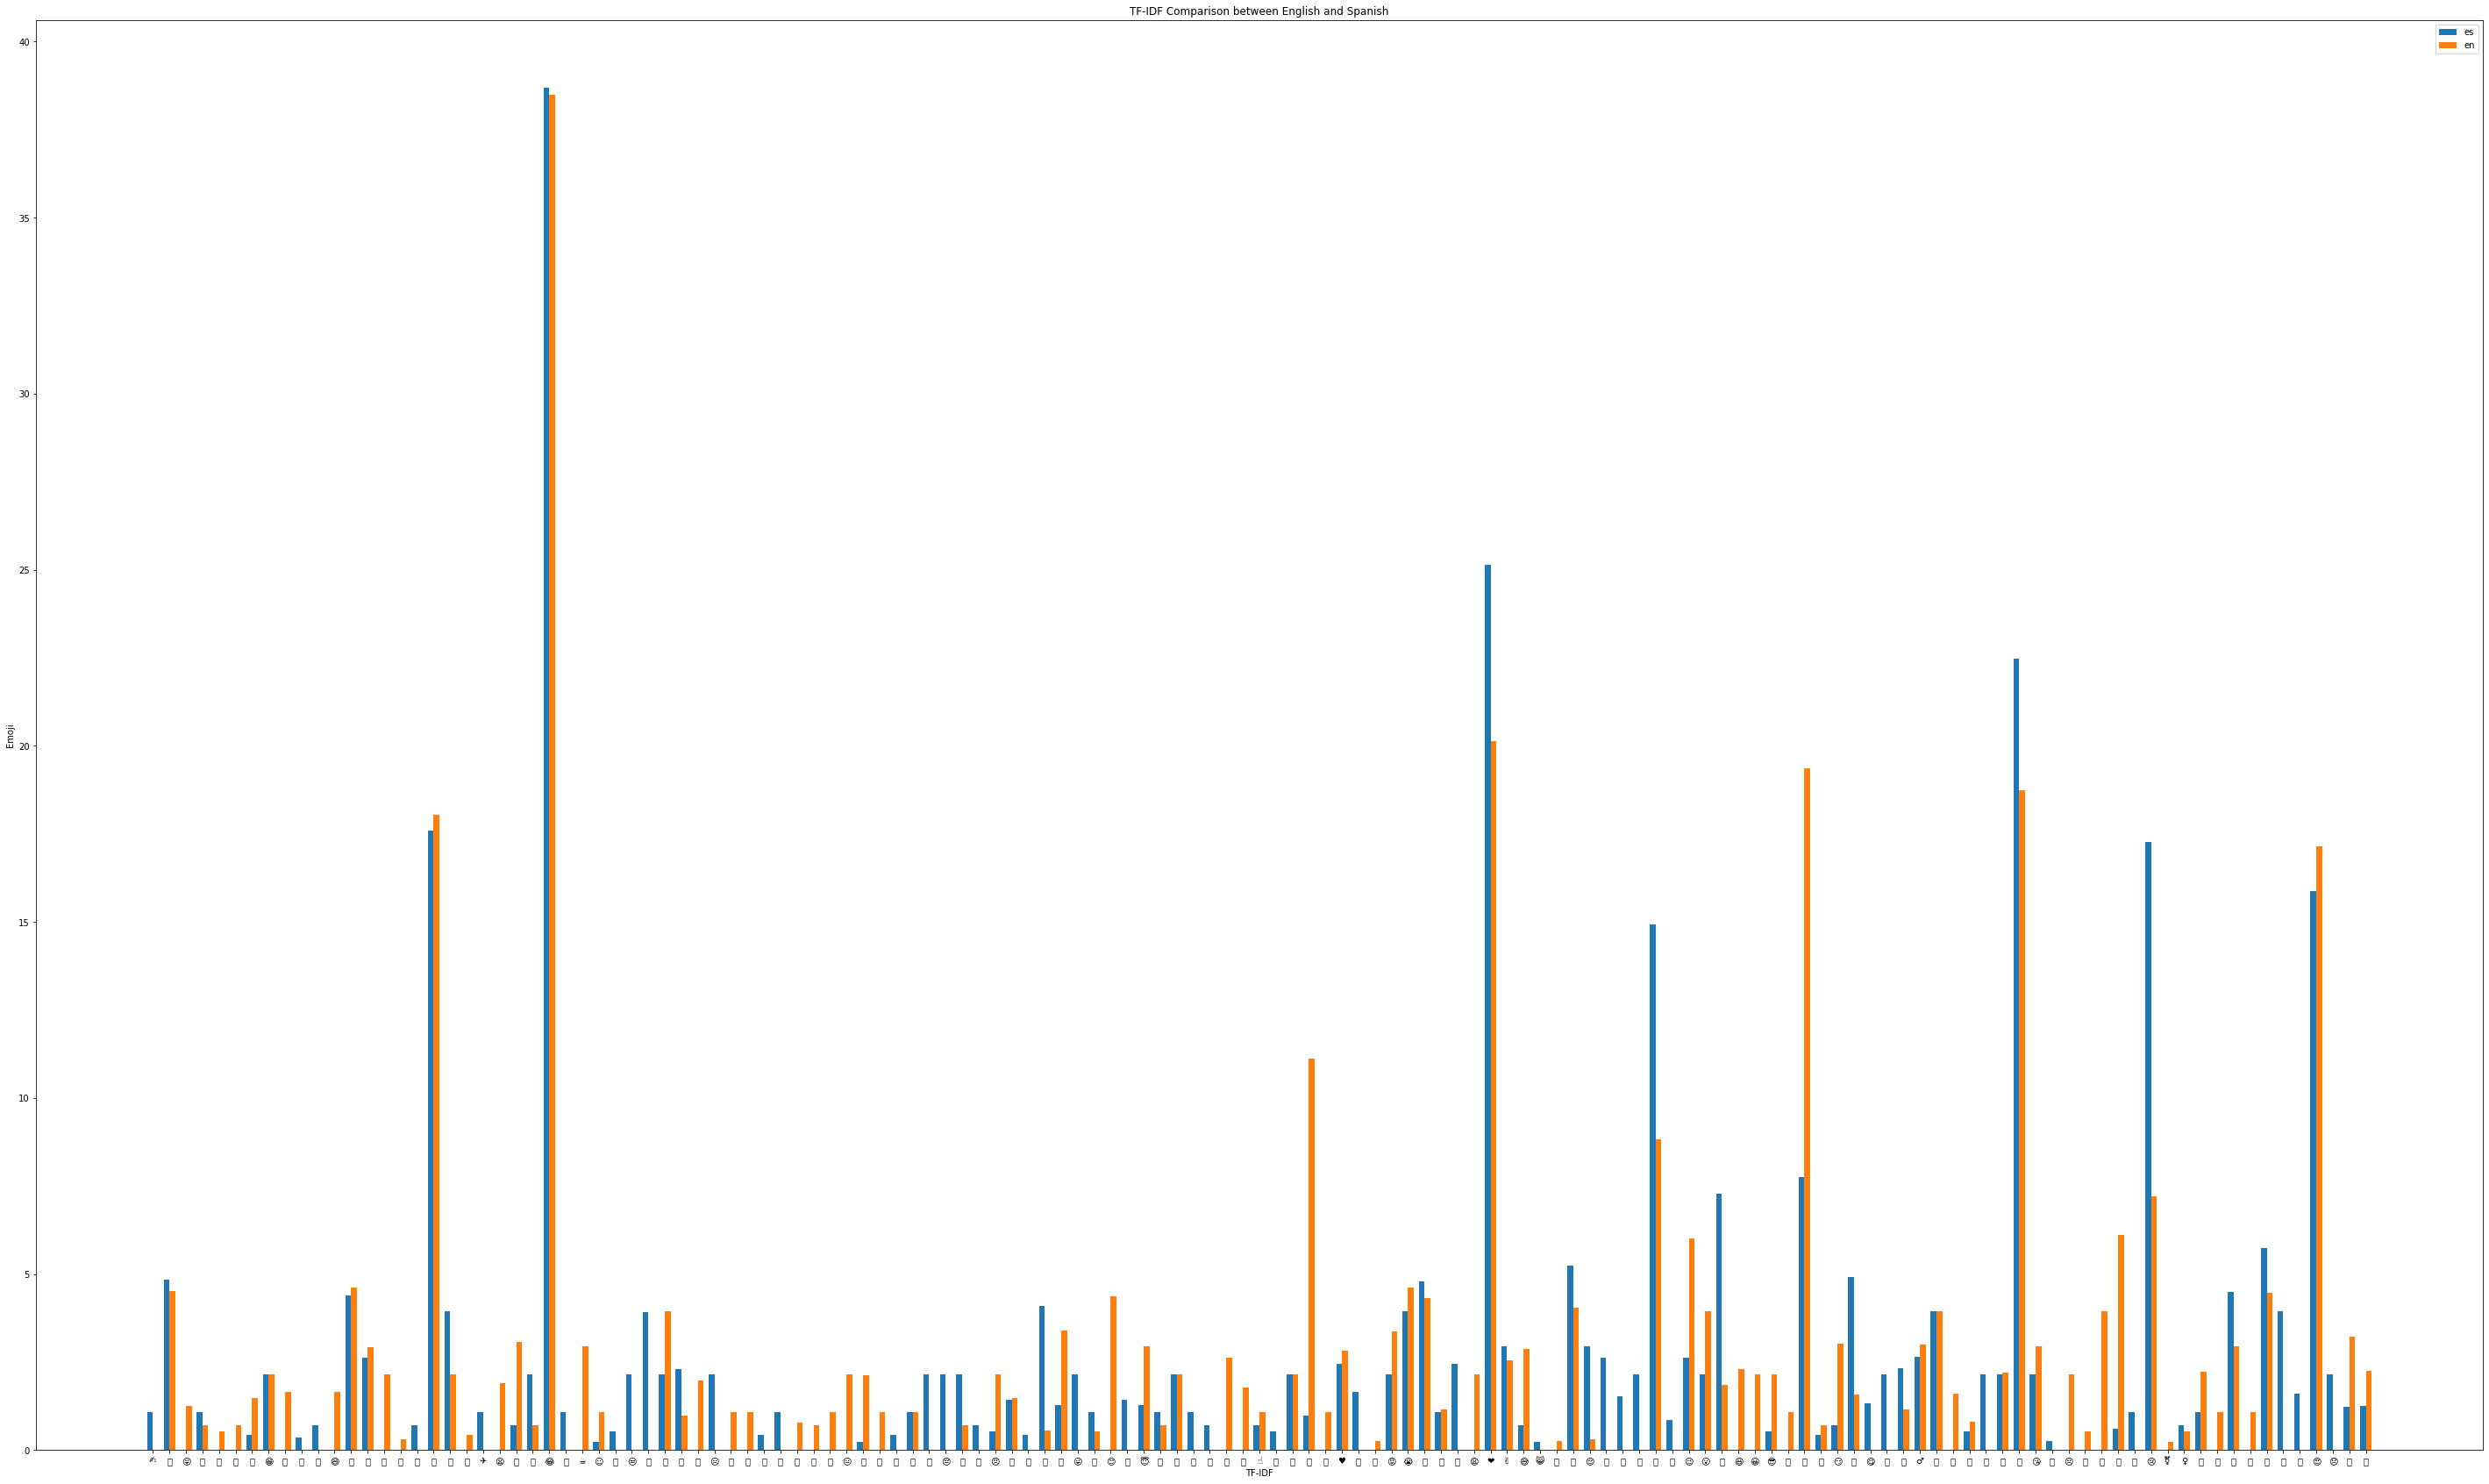

In [29]:
# Set the width of each bar
bar_width = 0.35

# Calculate the x-axis positions for each variable
x = np.arange(len(es_sums.index))


fig, ax = plt.subplots(figsize=(50, 30)) 
ax.bar(x - bar_width / 2, es_sums, bar_width, label='es', align='center')
ax.bar(x + bar_width / 2, en_sums, bar_width, label='en', align='center')

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(es_sums.index)

# Add labels, legend, and title
ax.set_xlabel('TF-IDF')
ax.set_ylabel('Emoji')
ax.set_title('TF-IDF Comparison between English and Spanish')
ax.legend()

# Show the plot
plt.show()

In [38]:
# es > en
for i in range(len(es_sums)):
    if es_sums[i] - en_sums[i] > 5:
        print(es_sums.index.tolist()[i])

🙌
💙
😢


In [39]:
# en > es
for i in range(len(es_sums)):
    if en_sums[i] - es_sums[i] > 5:
        print(es_sums.index.tolist()[i])

💀
🤣
🐐


## 🐐 Goat has different meanings between two languages

In [40]:
es_sums.index.tolist().index('🐐')

119

In [42]:
en_sums[119]

6.1186580945217015

In [41]:
es_sums[119]

0.6131794387652109

In [43]:
es_sums.index.tolist().index('💙')

95

In [44]:
en_sums[95]

1.845098040014257

In [45]:
es_sums[95]

7.2865306283386815